In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘画风格
plt.style.use('ggplot')

# 设置背景色
plt.rcParams['axes.facecolor'] = 'white'
# 设置分辨率
plt.rcParams['figure.dpi'] = 100

In [12]:
"""
读取数据
"""
data_RJ = pd.read_excel('入境(1).xlsx',index_col=0)
data_RJ.head()

,阿鲁巴,安哥拉,阿尔巴尼亚,安道尔共和国,阿根廷,亚美尼亚,美属萨摩亚,安提瓜和巴布达,澳大利亚,奥地利,...,圣文森特和格林纳丁斯,委内瑞拉玻利瓦尔共和国,英屬維爾京群島,美属维京群岛,越南,瓦努阿图,世界,南非,赞比亚,津巴布韦
1995.0,912000.0,9000.0,304000.0,3146000.0,2289000.0,12000.0,34000.0,447000.0,3726000.0,17173000.0,...,218000.0,879000.0,219000.0,1741000.0,1351000.0,82000.0,1.082522e+09,4684000.0,163000.0,1416000.0
1996.0,957000.0,21000.0,287000.0,4715000.0,2614000.0,13000.0,35000.0,498000.0,4165000.0,17090000.0,...,216000.0,960000.0,244000.0,1779000.0,1607000.0,103000.0,1.143489e+09,5186000.0,264000.0,1597000.0
1997.0,947000.0,45000.0,119000.0,6284000.0,2764000.0,23000.0,26000.0,526000.0,4318000.0,16647000.0,...,200000.0,933000.0,244000.0,2128000.0,1716000.0,81000.0,1.193996e+09,5170000.0,341000.0,1336000.0
1998.0,906000.0,52000.0,184000.0,7853000.0,3012000.0,32000.0,36000.0,570000.0,4167000.0,17352000.0,...,202000.0,813000.0,279000.0,2139000.0,1520000.0,78000.0,1.209957e+09,5898000.0,362000.0,2090000.0
1999.0,972000.0,45000.0,371000.0,9422000.0,2898000.0,41000.0,41000.0,560000.0,4459000.0,17467000.0,...,223000.0,702000.0,284000.0,1964000.0,1782000.0,96000.0,1.254467e+09,6026000.0,404000.0,2250000.0


In [13]:
"""
统计入境总人数
"""
RJ_count = data_RJ.apply(lambda x:x.sum(), axis=0)
# 进行排序
RJ_count = RJ_count.sort_values(ascending=False)
RJ_count
# 导出excel
RJ_count.to_excel('需要牛子哥处理的数据.xlsx')

In [14]:
"""
出境数据处理
"""
data_CJ = pd.read_excel('出境(1).xlsx',index_col=0)
data_CJ.head()

,亚美尼亚,澳大利亚,奥地利,阿塞拜疆,比利时,保加利亚,白俄罗斯,玻利维亚,巴西,中歐和波羅的海,...,土耳其,中高等收入国家,乌拉圭,美国,乌兹别克斯坦,委内瑞拉玻利瓦尔共和国,瓦努阿图,世界,萨摩亚,津巴布韦
1995.0,57333.333333,2519000.0,6975800.0,251000.0,6031400.0,3524000.0,866600.0,249000.0,2600000.0,8.213741e+07,...,3981000.0,1.733246e+08,511600.0,74031000.0,297666.666667,534000.0,11000.0,7.961075e+08,68000.0,256000.0
1996.0,67333.333333,2732000.0,7147800.0,432000.0,5645000.0,3006000.0,1553000.0,269000.0,3797000.0,9.079713e+07,...,4261000.0,1.688569e+08,555500.0,76803000.0,275666.666667,511000.0,11000.0,8.599194e+08,66000.0,69000.0
1997.0,77333.333333,2933000.0,7319800.0,654000.0,7548000.0,3059000.0,2239400.0,285000.0,4014000.0,9.699563e+07,...,4633000.0,1.764819e+08,562000.0,78481000.0,246000.000000,460000.0,11000.0,9.300660e+08,64000.0,123000.0
1998.0,87333.333333,3161000.0,7491800.0,1146000.0,7776000.0,2592000.0,2925800.0,299000.0,4171000.0,9.854064e+07,...,4601000.0,1.803659e+08,654000.0,82758000.0,247000.000000,752000.0,12000.0,9.821260e+08,62000.0,213000.0
1999.0,97333.333333,3210000.0,7663800.0,1204000.0,6410000.0,2376000.0,3612200.0,253000.0,2863000.0,1.033589e+08,...,4758000.0,1.917431e+08,778000.0,84540000.0,202000.000000,754000.0,12000.0,1.043185e+09,58000.0,331000.0


In [15]:
"""
统计每个国家的出境总人数
"""
CJ_count = data_CJ.apply(lambda x:x.sum(), axis=0)
# 进行排序
CJ_count = CJ_count.sort_values(ascending=False)
CJ_count
# 导出excel
CJ_count.to_excel('需要牛子哥处理的出境数据.xlsx')

In [30]:
"""
导入入境数据并可视化
"""
plot_data = pd.read_excel('需要牛子哥处理的入境数据（处理完）(1).xlsx')
plot_data.head()

,国家名称,入境人数
0,美国,3.250243e+09
1,中国,2.835619e+09
2,墨西哥,2.357321e+09
3,西班牙,2.320597e+09
4,波兰,1.832360e+09


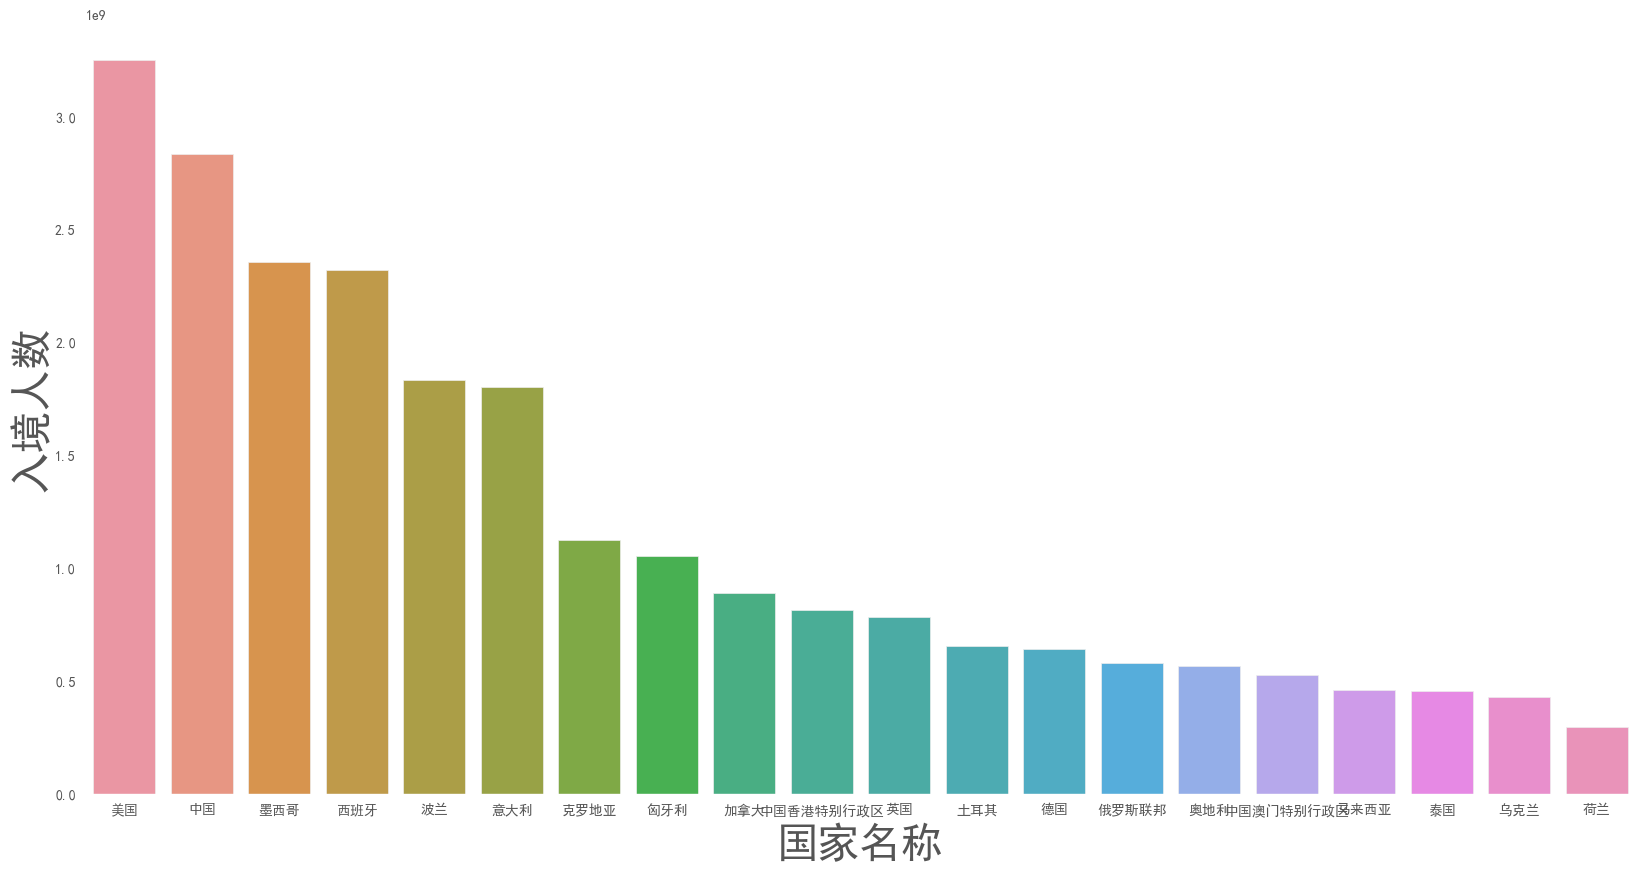

In [40]:
"""
绘图
"""
# x为国家名称前五个,y为入境人数前五个
x = plot_data['国家名称'].head(20)
y = plot_data['入境人数'].head(20)
# 用seaborn绘图
# 设置图片尺寸
plt.figure(figsize=(20, 10))
sns.barplot(x=x, y=y)

# 设置x轴标签
plt.xlabel('国家名称',fontsize=30)
# 设置y轴标签
plt.ylabel('入境人数',fontsize=30)
# 展示图形
plt.show()


In [37]:
"""
导入出境数据并可视化
"""
plot_data_second = pd.read_excel('需要牛子哥处理的出境数据（处理完）(1).xlsx')
plot_data_second.head()

,国家名称,出境人数
0,美国,2.842470e+09
1,墨西哥,2.673001e+09
2,德国,2.070208e+09
3,中国香港特别行政区,1.807336e+09
4,英国,1.666485e+09


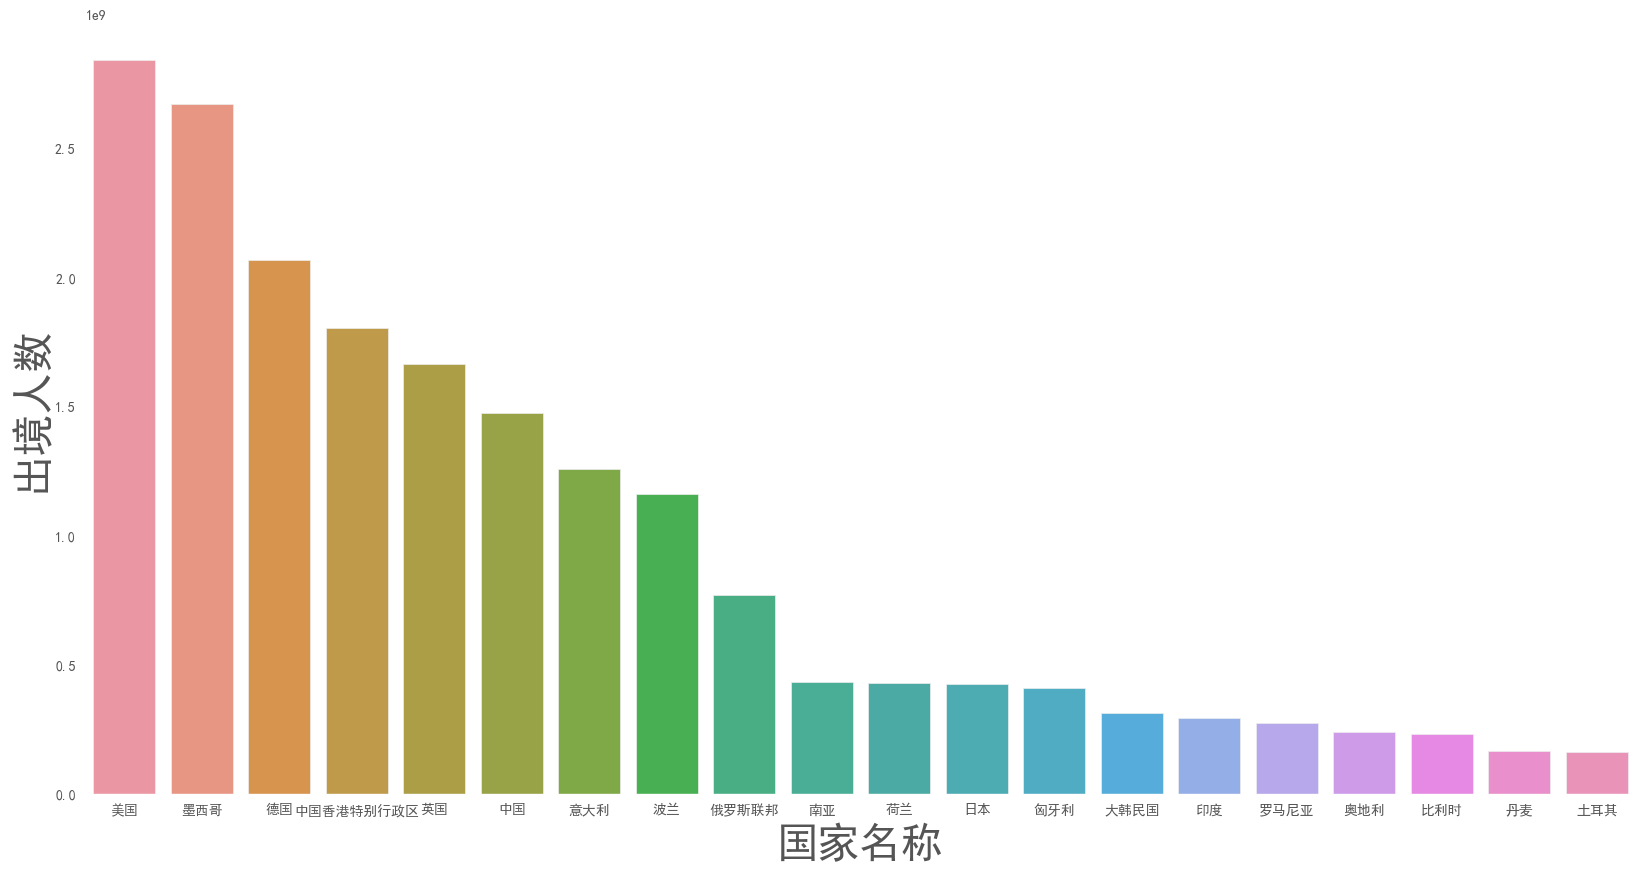

In [41]:
"""
绘图
"""
# x为国家名称前五个,y为入境人数前五个
x = plot_data_second['国家名称'].head(20)
y = plot_data_second['出境人数'].head(20)
# 用seaborn绘图
# 设置图片尺寸
plt.figure(figsize=(20, 10))
sns.barplot(x=x, y=y)

# 设置x轴标签
plt.xlabel('国家名称',fontsize=30)
# 设置y轴标签
plt.ylabel('出境人数',fontsize=30)
# 展示图形
plt.show()
